In [186]:
# Import our libraries we are going to use for our data analysis.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Other Libraries
import time

df = pd.read_csv('loan.csv')

# Copy of the dataframe
original_df = df.copy()

df.head()

<ipython-input-186-c27c0024d682>:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [188]:
# Replace the name of some columns
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

# selecting columns revelant to the study
df = df[["loan_amount","funded_amount","investor_funds","interest_rate","annual_income","issue_d","loan_status",
"addr_state","emp_length", "grade","term",'dti' ,'sub_grade','home_ownership','verification_status','purpose','emp_title']]


In [189]:
# Checking NA vlaues
df.isnull().sum()
# we only have NAN's in one column and we dont have any logical way for imputing them, hence we will drop them

,0
loan_amount,0
funded_amount,0
investor_funds,0
interest_rate,0
annual_income,0
issue_d,0
loan_status,0
addr_state,0
emp_length,1075
grade,0


In [190]:
#remove missing values from emp_length and emo_title as its not possible to fill na logically here
df = df.dropna()

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37202 entries, 1 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amount          37202 non-null  int64  
 1   funded_amount        37202 non-null  int64  
 2   investor_funds       37202 non-null  float64
 3   interest_rate        37202 non-null  object 
 4   annual_income        37202 non-null  float64
 5   issue_d              37202 non-null  object 
 6   loan_status          37202 non-null  object 
 7   addr_state           37202 non-null  object 
 8   emp_length           37202 non-null  object 
 9   grade                37202 non-null  object 
 10  term                 37202 non-null  object 
 11  dti                  37202 non-null  float64
 12  sub_grade            37202 non-null  object 
 13  home_ownership       37202 non-null  object 
 14  verification_status  37202 non-null  object 
 15  purpose              37202 non-null  obje

### **Outliers based on IQR**

In [192]:
# Fixing interest rate
df['interest_rate'] = df['interest_rate'].apply(lambda x:float(x.split('%')[0]))
df['interest_rate'] = pd.to_numeric(df['interest_rate'])

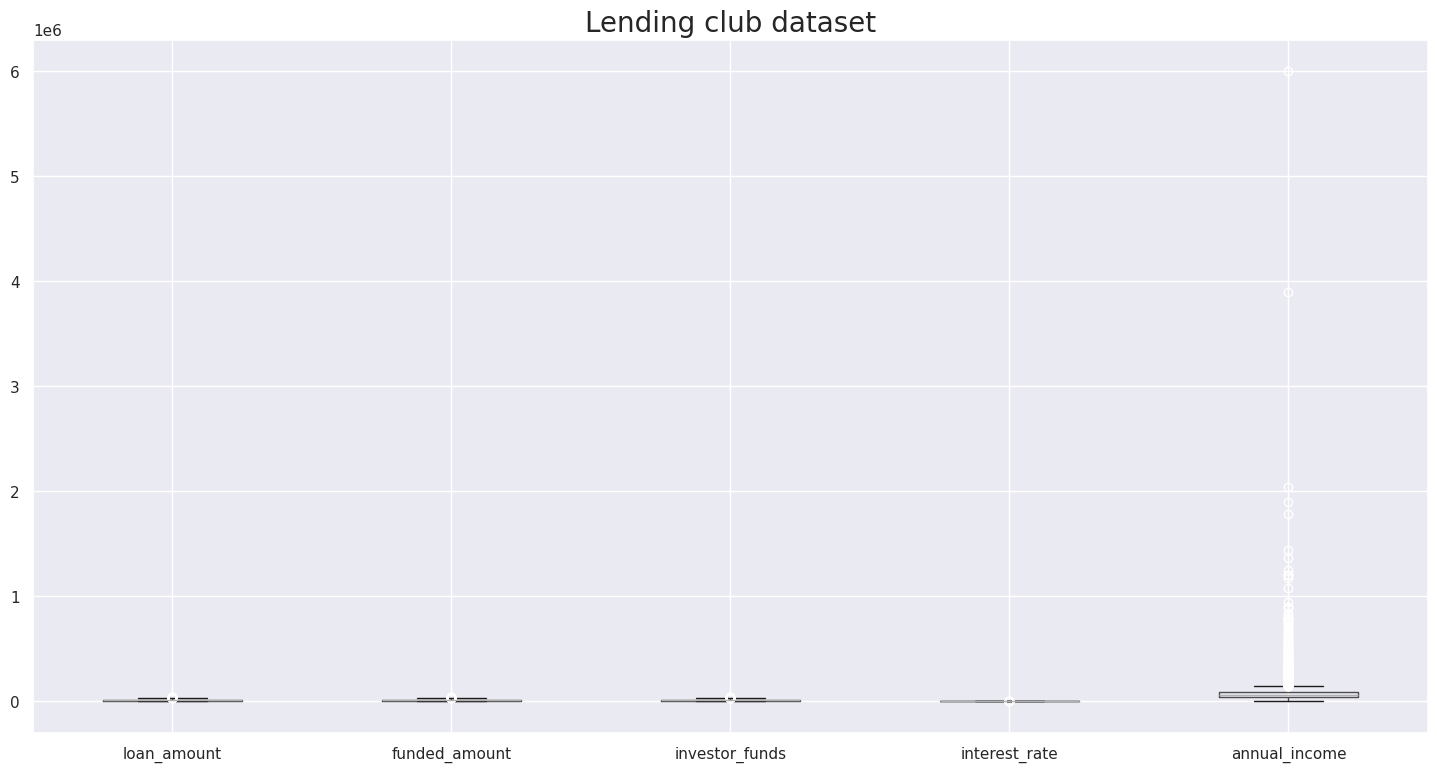

In [193]:
num_cols = ["loan_amount","funded_amount","investor_funds","interest_rate","annual_income"]
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Lending club dataset", fontsize=20)
plt.show()

Let’s inspect the ‘annual_inc’ feature as an example to build a better understanding of observation ranges inside. Pandas .describe function can quickly return us statistical insights:

In [194]:
df.annual_income.describe()

,annual_income
count,3.720200e+04
mean,6.923948e+04
std,6.419176e+04
min,4.000000e+03
25%,4.155110e+04
50%,6.000000e+04
75%,8.280000e+04
max,6.000000e+06


We see that a max value of observations in annual_inc is 6 M USD which is likely not to describe our population of people who apply for loans. Business-wise we may not need to predict such cases, this logic gives us the confidence to drop these types of outliers.

In [195]:
Q1 = df["annual_income"].quantile(0.25)
Q3 = df["annual_income"].quantile(0.75)
IQR = Q3 - Q1

df = df[((df["annual_income"] >= (Q1 - 1.5 * IQR)) & (df["annual_income"] <= (Q3 + 1.5 * IQR)))]
df.describe()
# outliers have been removed

,loan_amount,funded_amount,investor_funds,interest_rate,annual_income,dti
count,35474.000000,35474.000000,35474.000000,35474.000000,35474.000000,35474.00000
mean,10938.967977,10683.585866,10140.494443,12.009459,61741.788460,13.55891
std,7153.581277,6899.560563,6840.076636,3.690610,27784.827771,6.64210
min,500.000000,500.000000,0.000000,5.420000,4000.000000,0.00000
25%,5400.000000,5275.000000,5000.000000,9.250000,40000.000000,8.50000
50%,9600.000000,9600.000000,8775.000000,11.860000,57000.000000,13.71000
75%,15000.000000,15000.000000,14000.000000,14.540000,78500.000000,18.82000
max,35000.000000,35000.000000,35000.000000,24.400000,144600.000000,29.99000


<ipython-input-196-d55dc2e4814a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_amount, ax=ax[0], color="#F7522F",kde=False)
<ipython-input-196-d55dc2e4814a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7",kde=False)
<ipython-input-196-d55dc2e4814

Text(0.5, 1.0, 'Total committed by Investors')

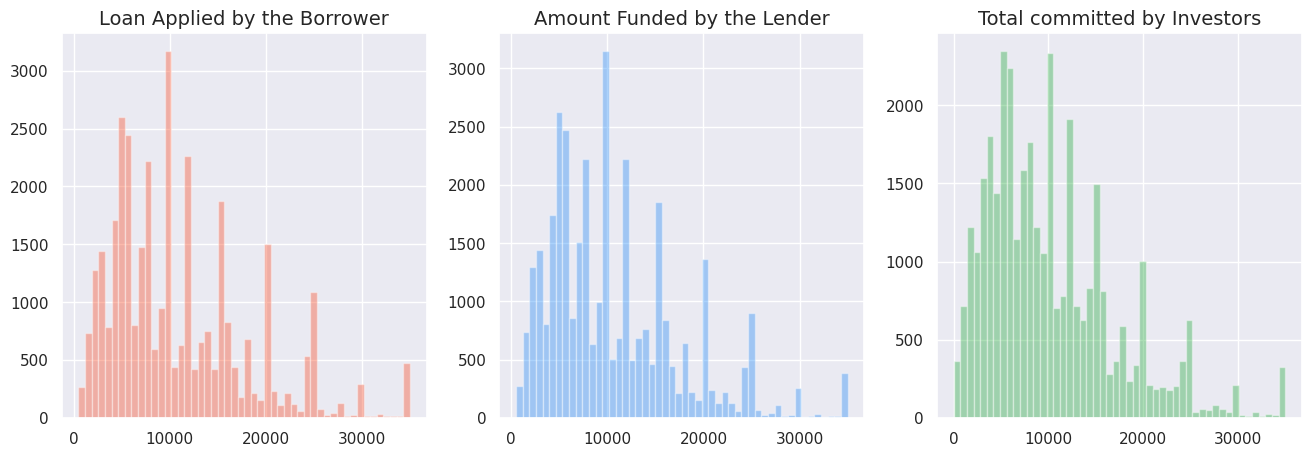

In [196]:
# We will now check the distribusion of few columns to understand the dataste better
fig, ax = plt.subplots(1, 3, figsize=(16,5))
loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values
sns.distplot(loan_amount, ax=ax[0], color="#F7522F",kde=False)
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7",kde=False)
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46",kde=False)
ax[2].set_title("Total committed by Investors", fontsize=14)

In [197]:
# Lets' transform the issue dates by year.
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'].str.upper(), format='%b-%y', yearfirst=False)
df['year'] = dt_series.dt.year

<ipython-input-198-7482bdfbd0e8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'year', y = 'loan_amount', data=df, palette='tab10')


Text(0, 0.5, 'Average loan amount issued')

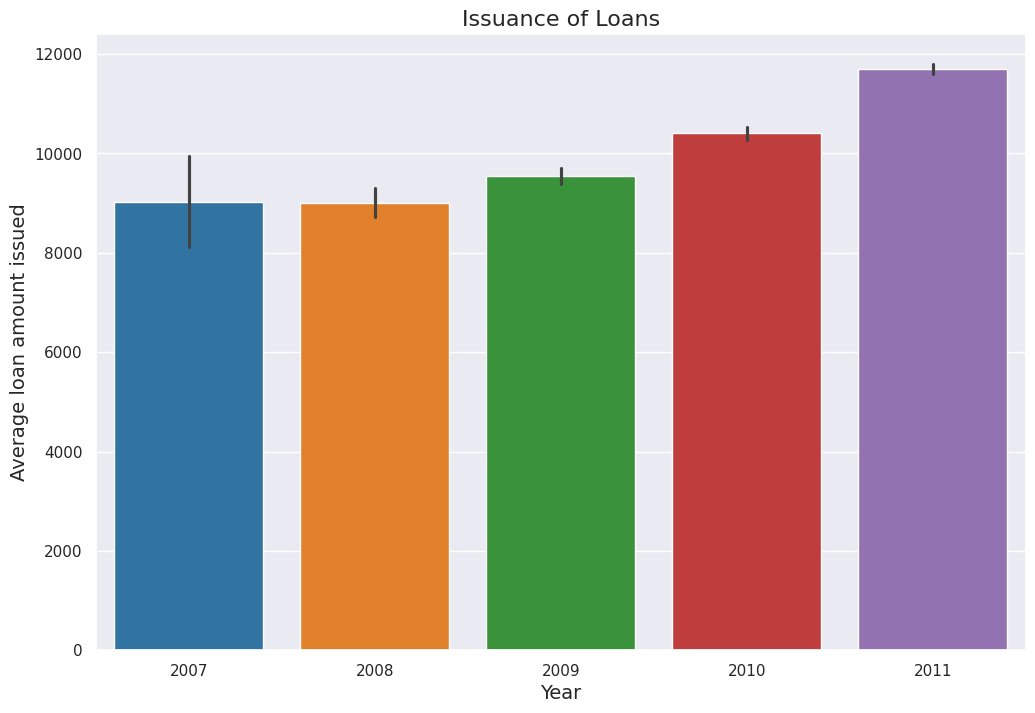

In [198]:
# The year of 2011 was the year were the highest amount of loans were issued
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot(x = 'year', y = 'loan_amount', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

<h1 align="center"> Good Loans vs Bad Loans: </h1>
<h2>Types of Loans: </h2>

<h4> What we need to know: </h4>
<ul>
<li> The amount of bad loans could <b>increment</b> as the days pass by, since we still have a great amount of current loans. </li>
<li> <b>Average annual income</b> is an important key metric for finding possible opportunities of investments in a specific region. </li>

</ul>

In [199]:
df["loan_status"].value_counts()

,count
loan_status,
Fully Paid,29531
Charged Off,4954
Current,989


In [200]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off"]


df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'


df['loan_condition'] = df['loan_status'].apply(loan_condition)

[Text(0, 0.5, '(%)')]

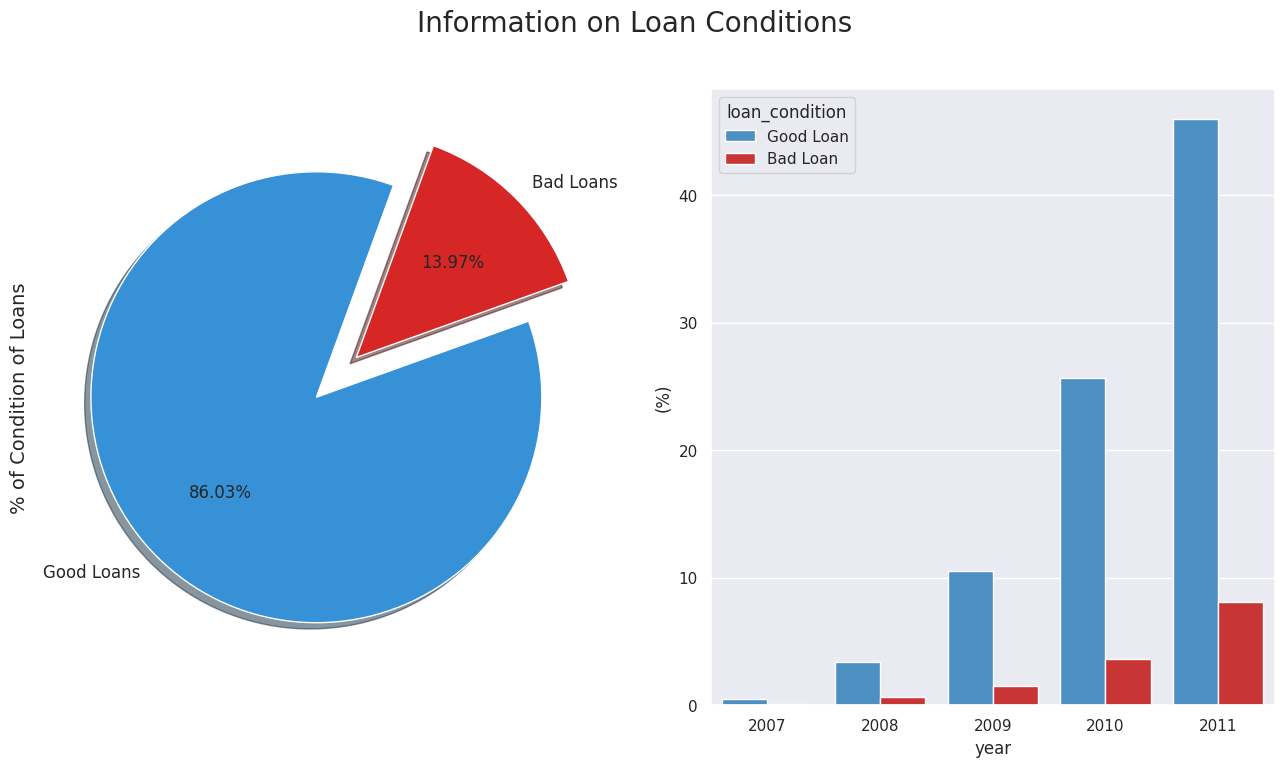

In [201]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

<h2> Loans Issued by Region</h2>

In [202]:
df['addr_state'].unique()

array(['GA', 'CA', 'OR', 'AZ', 'NC', 'TX', 'VA', 'IL', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'SD', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [203]:
# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'



df['region'] = df['addr_state'].apply(finding_regions)

In [204]:
# This code will take the current date and transform it into a year-month format
df['complete_date'] = pd.to_datetime(df['issue_d'].str.upper(), format='%b-%y', yearfirst=True)

Text(0.5, 1.0, 'Loans issued by Region')

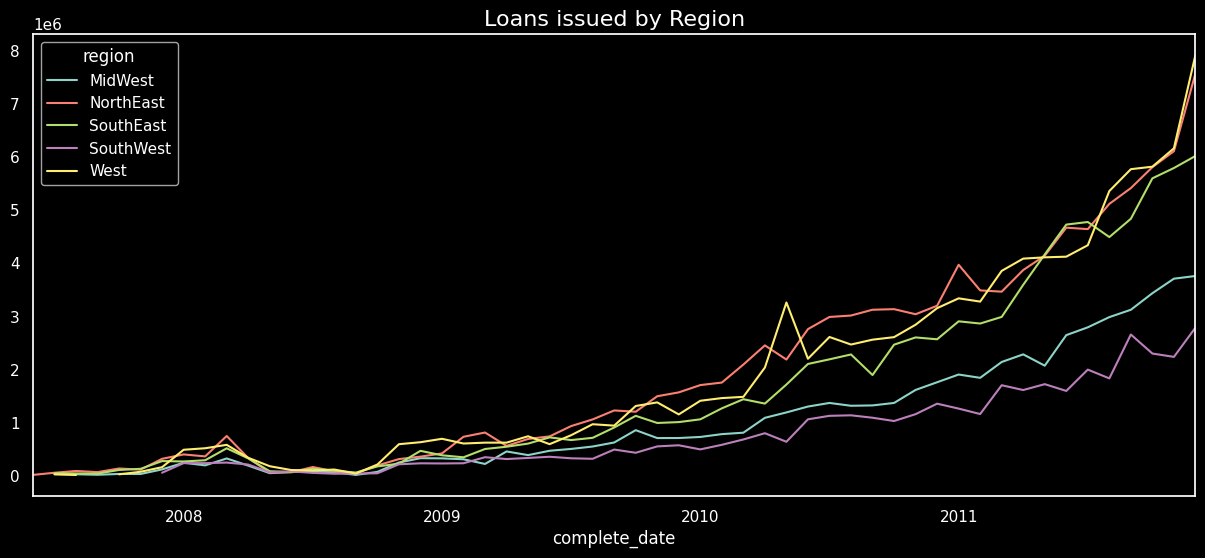

In [205]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df.groupby(['complete_date', 'region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

In [206]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0




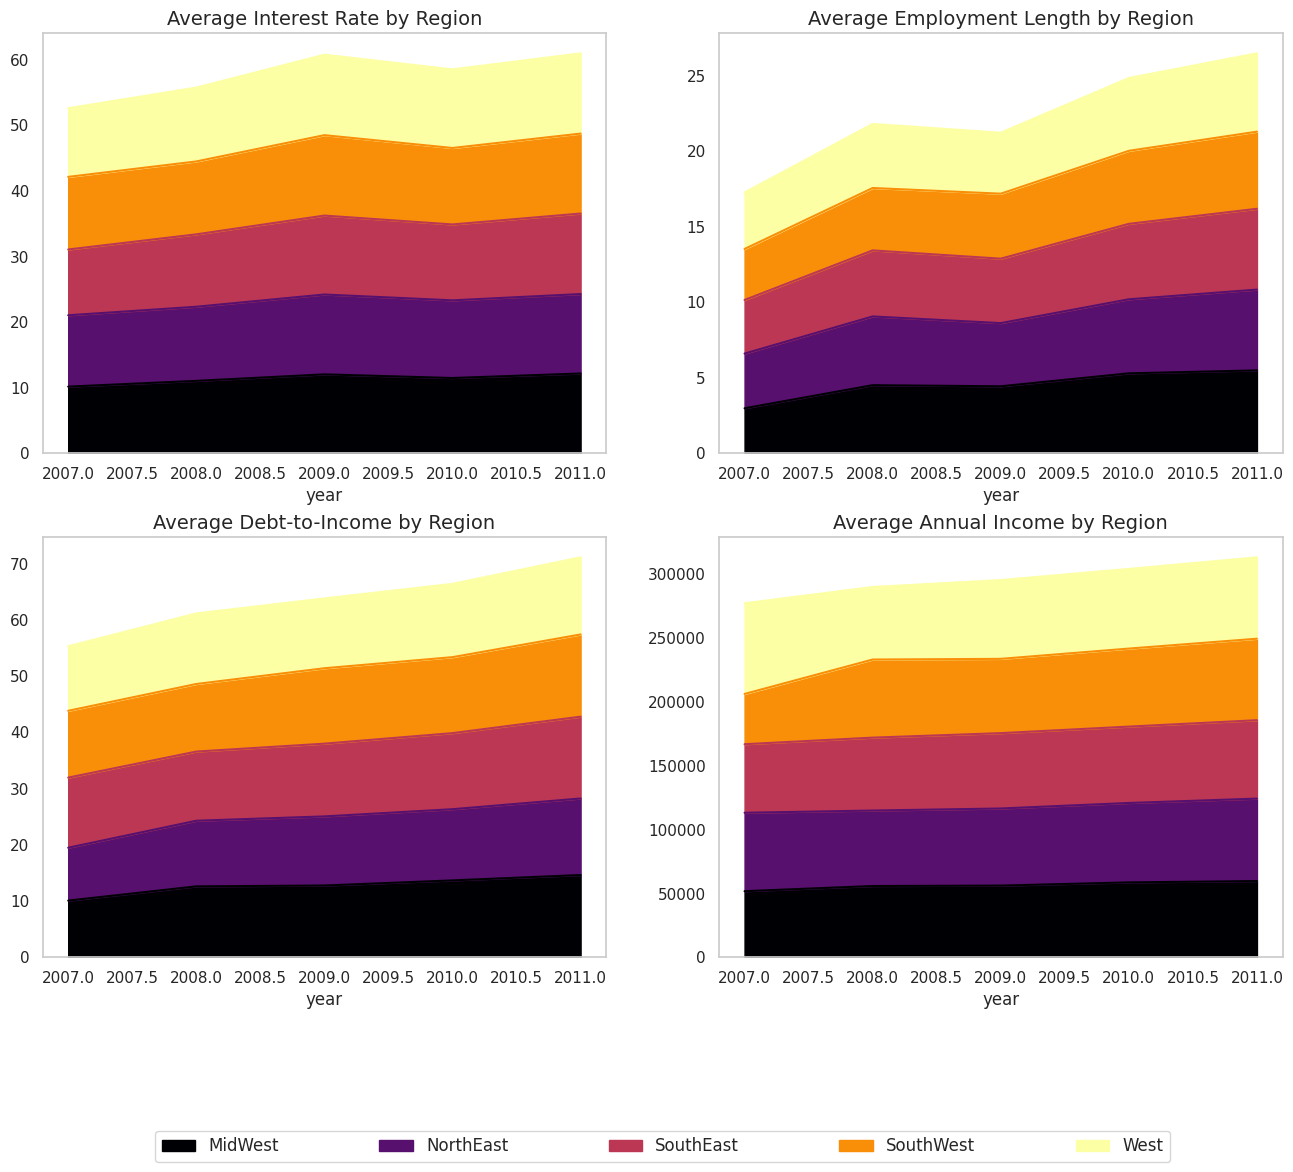

In [207]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = df.groupby(['year', 'region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_income.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

In [208]:
# Average interest rates clients pay
print(df['interest_rate'].mean())
# Average annual income of clients
df['annual_income'].mean()

12.009459322320573


61741.78845999887

<h1 align="center"> The Business Perspective </h1>
<h2 > Understanding the Operative Side of Business </h2>

<h4> What we need to know: </h4>
<ul>
<li> We will focus on <b>three key metrics</b>: Loans issued by state (Total Sum), Average interest rates charged to customers and average annual income of all customers by state. </li>
<li> The purpose of this analysis is to see states that give high returns at a descent risk. </li>

</ul>

In [209]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])


metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()



# Think of a way to add default rate
# Consider adding a few more metrics for the future

,state_codes,issued_loans,interest_rate,annual_income
0,IA,56450,8.97,50599.20
1,IL,15511550,12.04,62095.95
2,IN,86225,10.80,35416.11
3,KS,2585525,11.77,58268.40
4,MI,7249075,11.97,60868.13


In [210]:
metrics_df['issued_loans'] = pd.to_numeric(metrics_df['issued_loans'])
metrics_df['interest_rate'] = pd.to_numeric(metrics_df['interest_rate'])
metrics_df['annual_income'] = pd.to_numeric(metrics_df['annual_income'])

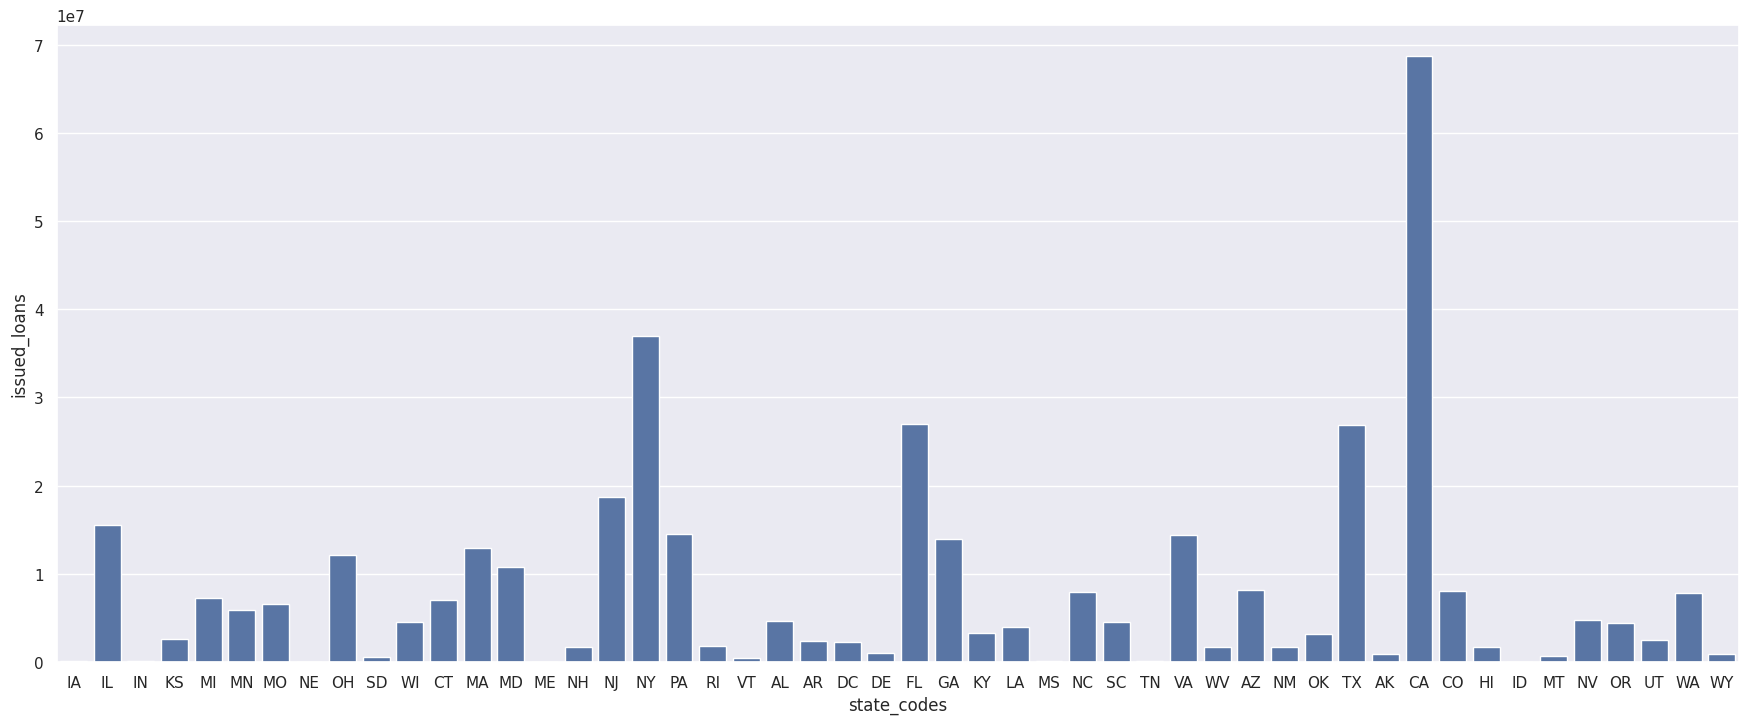

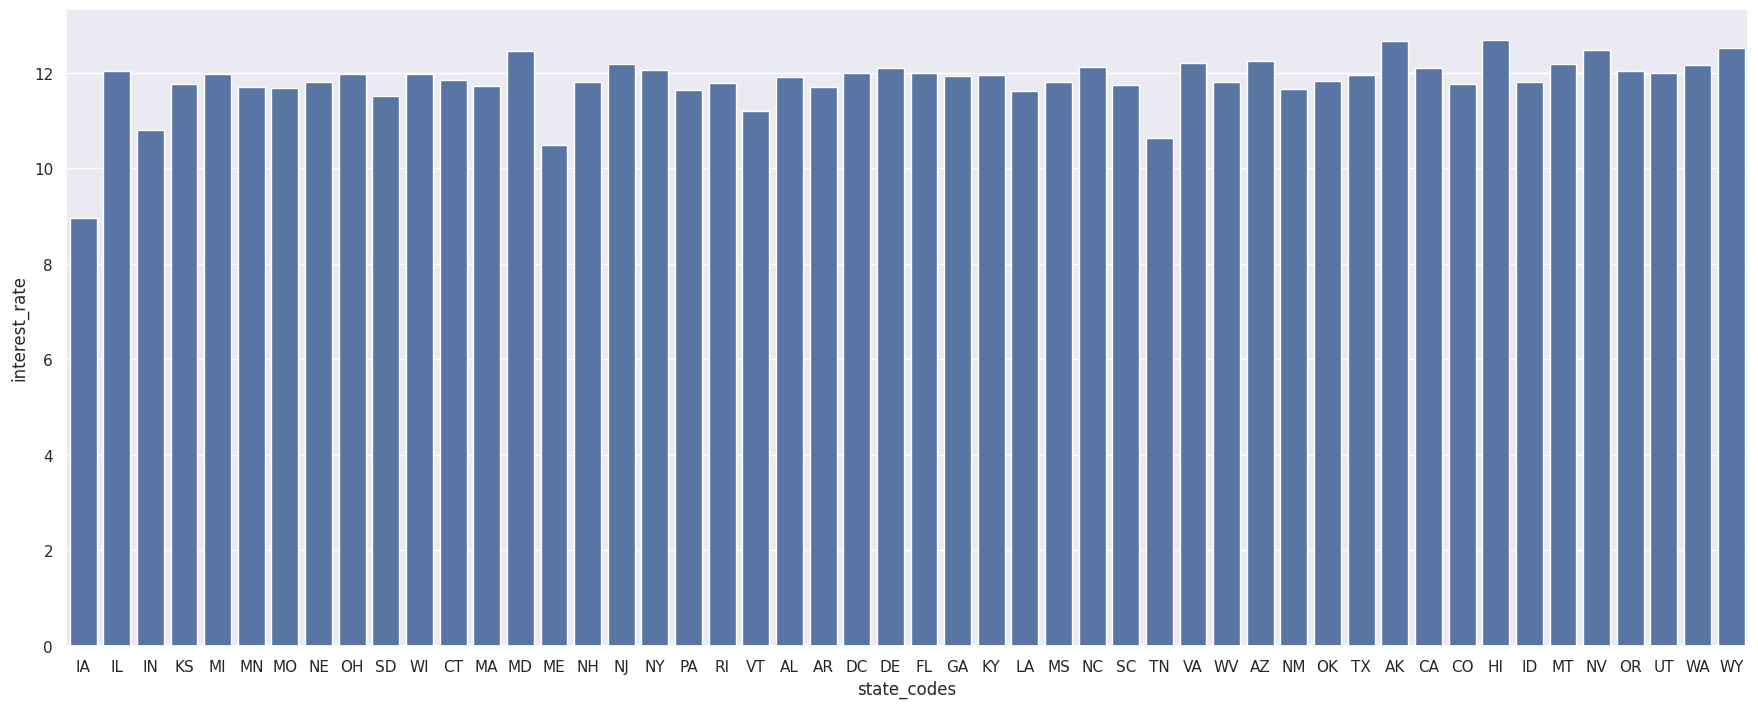

<Axes: xlabel='state_codes', ylabel='annual_income'>

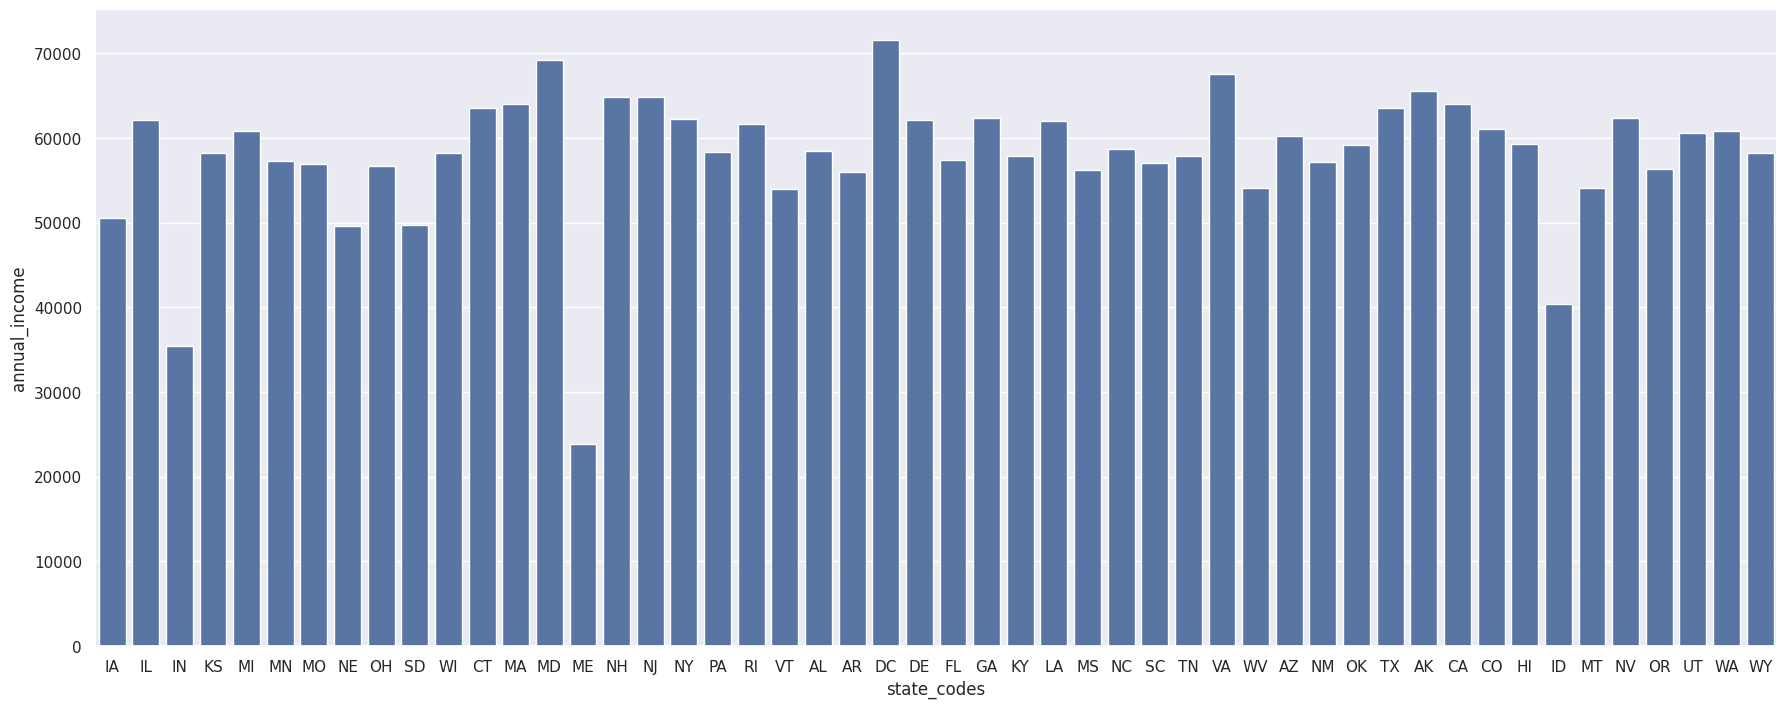

In [211]:
sns.set_theme(rc={'figure.figsize':(21.7,8.27)})
sns.barplot(x=metrics_df['state_codes'],y=metrics_df['issued_loans'])
plt.show()
sns.barplot(x=metrics_df['state_codes'],y=metrics_df['interest_rate'])
plt.show()
sns.barplot(x=metrics_df['state_codes'],y=metrics_df['annual_income'])


## Analysis by Income Category:

**What we need to know:** <br>
<ul>
<li><b>Low income category:</b> Borrowers that have an annual income lower or equal to 100,000 usd.</li>
<li> <b> Medium income category:</b> Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd. </li>
<li><b> High income category: </b> Borrowers that have an annual income higher tha 200,000 usd. </li>
</ul>

In [212]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

<ipython-input-212-3c9ac6bf566b>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'


In [213]:
# Let's transform the column loan_condition into integrers.

lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)

# Convert from float to int the column (This is our label)
df['loan_condition_int'] = df['loan_condition_int'].astype(int)

<ipython-input-214-ecd4e5c5c11a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="income_category", y="loan_amount", data=df, palette="Set2", ax=ax1 )
<ipython-input-214-ecd4e5c5c11a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="Set2", ax=ax2)
<ipython-input-214-ecd4e5c5c11a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income_category", y="emp_length_int", data=df, palette="Set2", ax=ax3)
<ipython-input-214-ecd4e5c5c11a>:8: FutureWarning: 

Passing `palette` 

<Axes: xlabel='income_category', ylabel='interest_rate'>

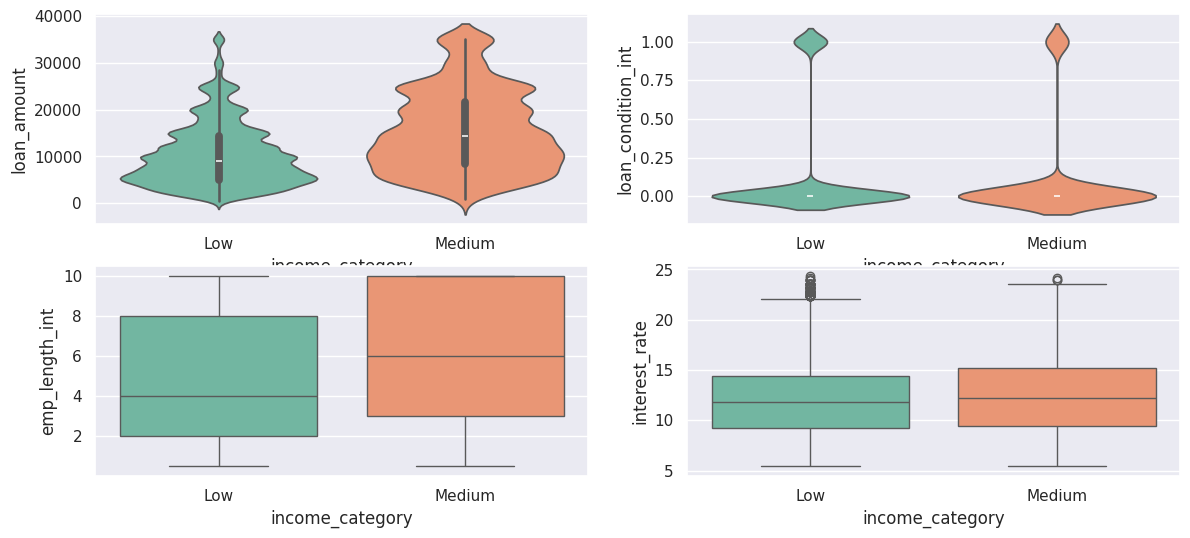

In [214]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amount", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="interest_rate", data=df, palette="Set2", ax=ax4)

## The Importance of Credit Scores:

<h4> What we need to know: </h4>
<ul>
<li> The lower the grade of the credit score, the higher the risk for investors. </li>
<li> There are different factors that influence on the level of risk of the loan.</li>
</ul>

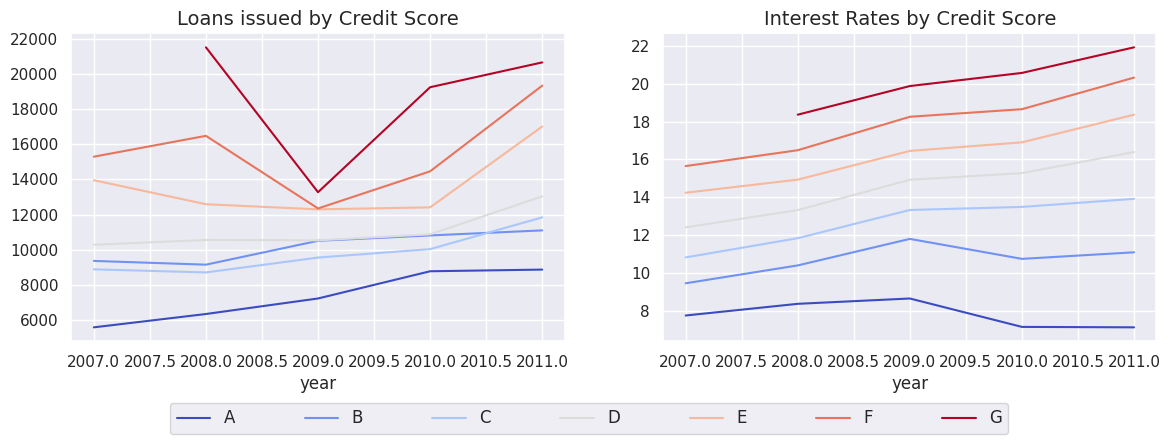

In [215]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amount.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)


by_inc = df.groupby(['year', 'grade']).interest_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

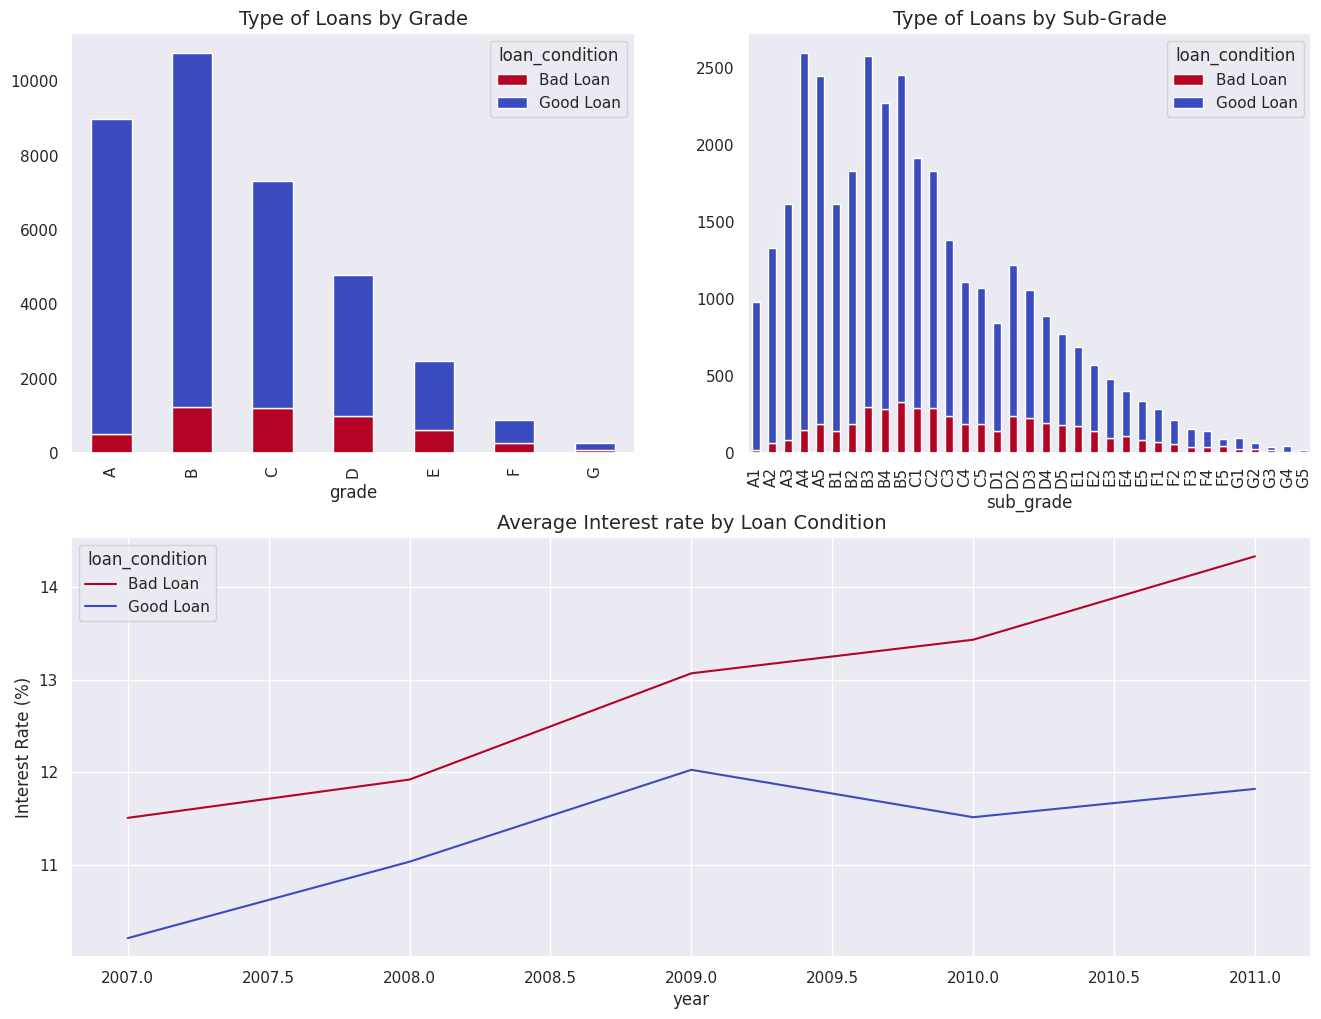

In [216]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df.groupby(['year', 'loan_condition']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

<h2>What Determines a Bad Loan </h2>

<h4> What we need to know: </h4>
<ul>
<li> There might be possible factors that contribute in whether a loan is bad or not. </li>
<li> Factors that increase risk include: low annual income, high debt to income, high interest rates, low grade, among others. </li>
</ul>

In [217]:
# Just get me the numeric variables
numeric_variables = df.select_dtypes(exclude=["object"])

<Axes: >

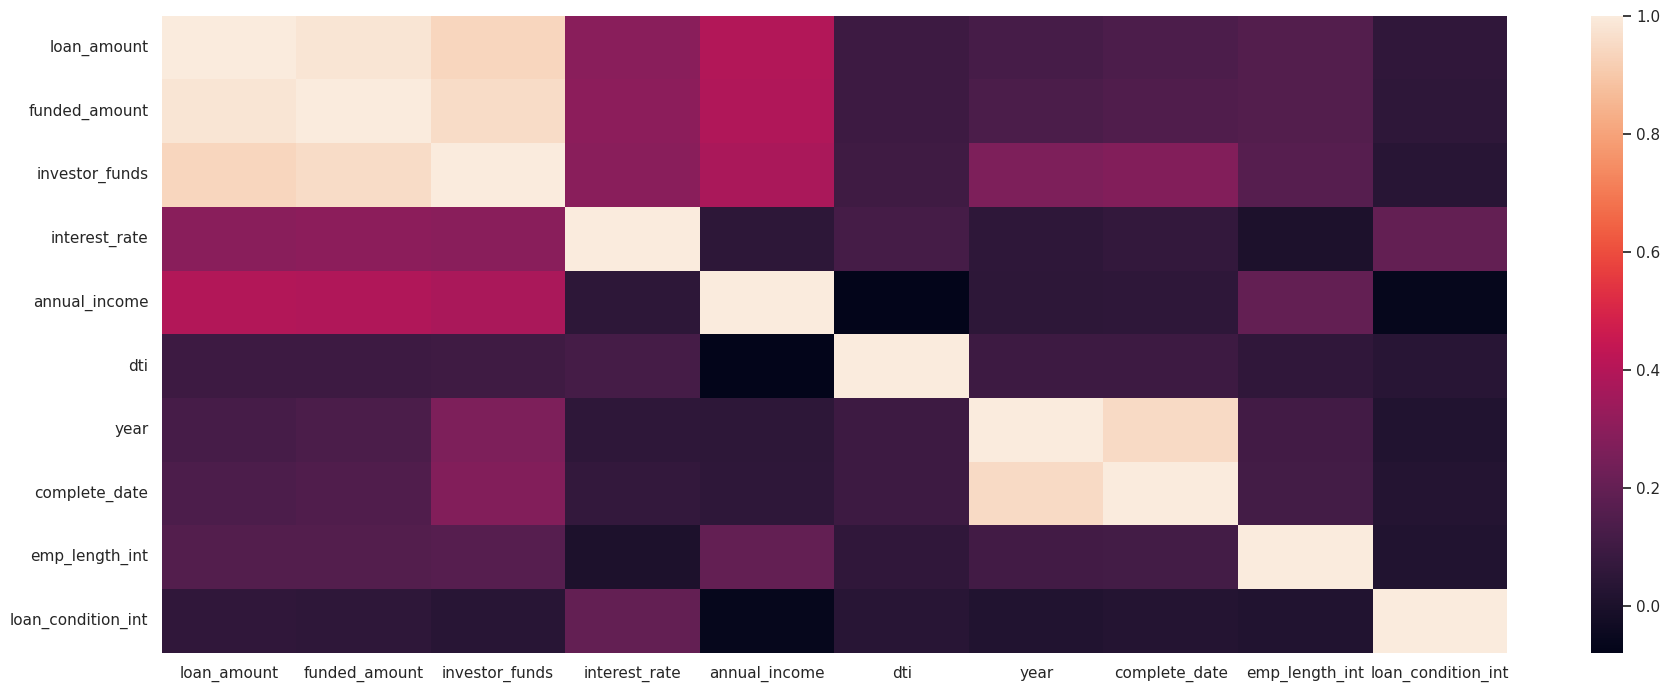

In [218]:
# We will use df_correlations dataframe to analyze our correlations.

sns.heatmap(numeric_variables.corr())

This data looks a little but messy maybe if we focus our correlation heatmap into columns that are more worth it we might actually see a trend with the **condition of the loan**.

<ipython-input-219-27e55cc32df5>:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  g = sns.boxplot(x='home_ownership', y='loan_amount', hue='loan_condition',
<ipython-input-219-27e55cc32df5>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=45)
<ipython-input-219-27e55cc32df5>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(),rotation=45)


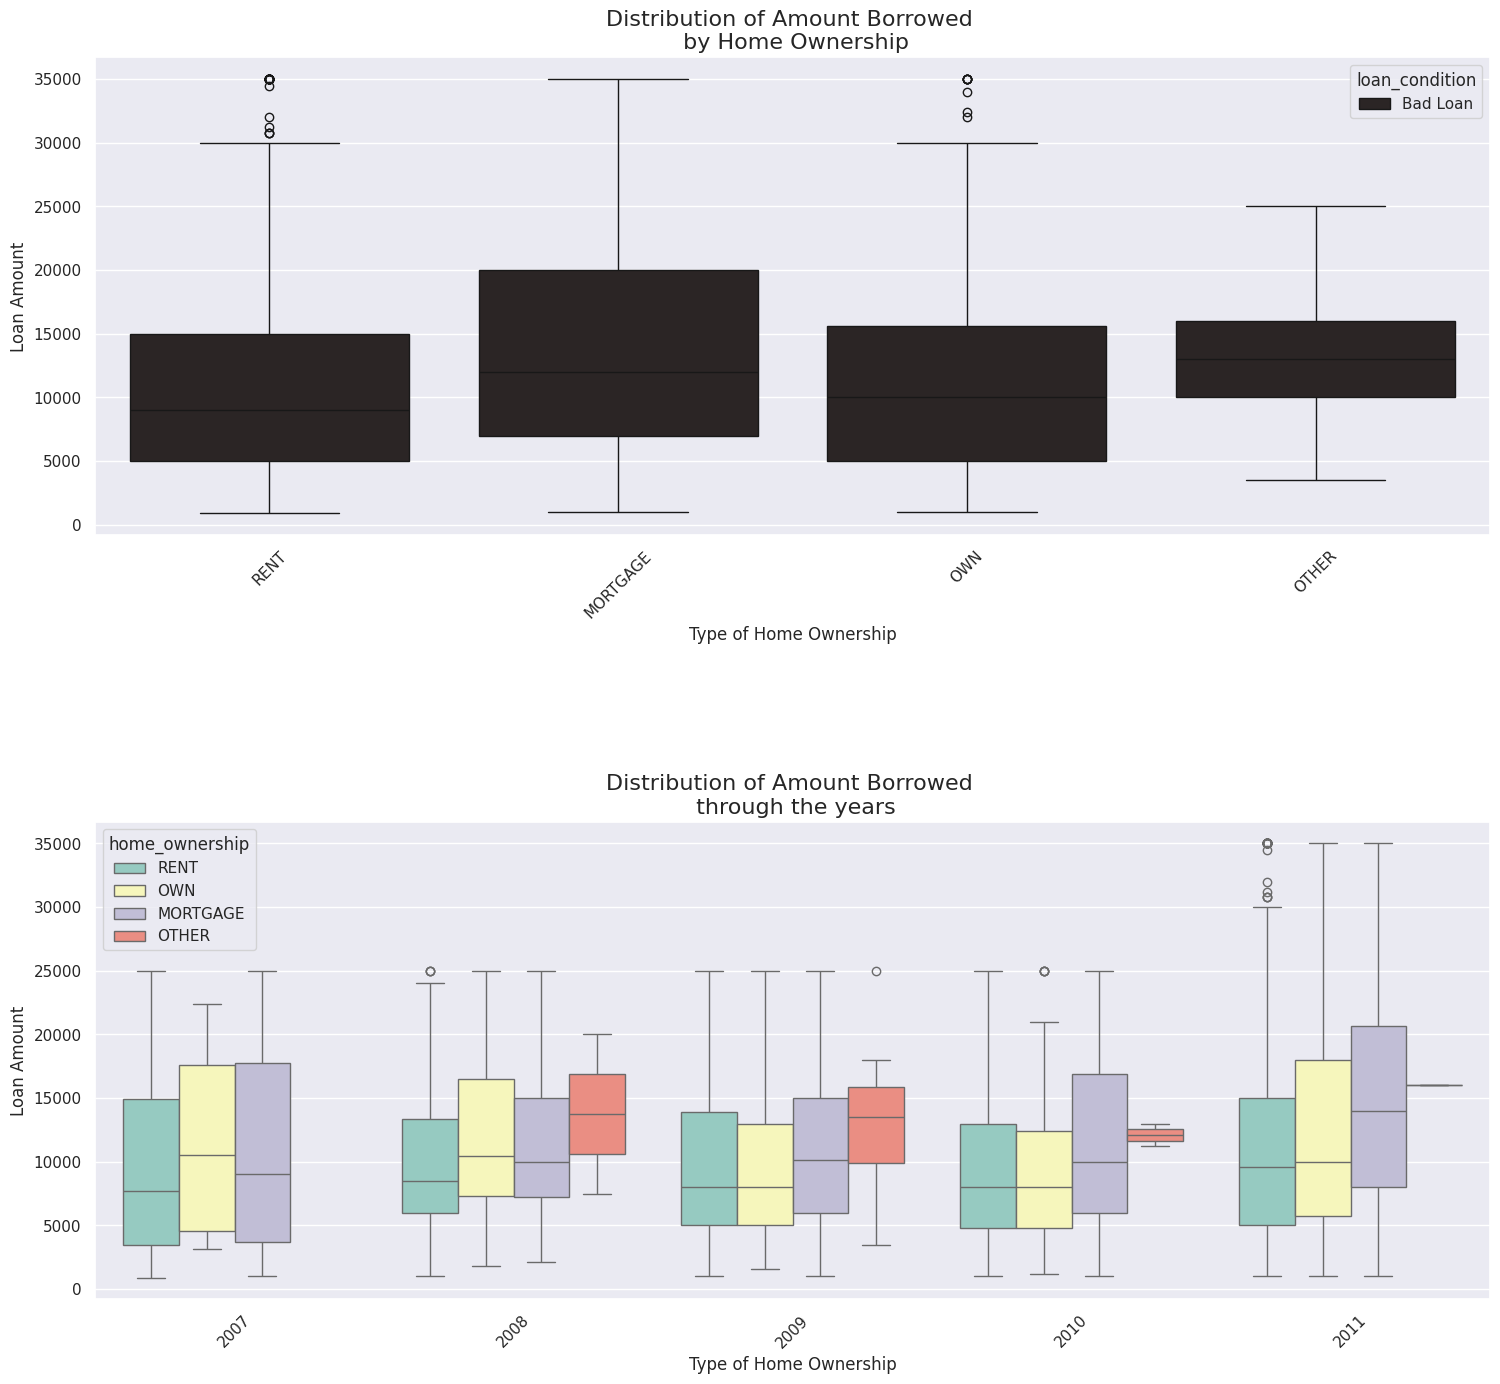

In [219]:
import seaborn as sns

plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = df.loc[df['loan_condition'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amount', hue='loan_condition',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amount', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

### Defaulted Loans and Level of Risk:
Main Aim:

*   Determine patters that will allow us to understand somehow factors that contribute to a loan being defaulted


In [220]:
# lets Check the intersent rates
df['interest_rate'].describe()

,interest_rate
count,35474.000000
mean,12.009459
std,3.690610
min,5.420000
25%,9.250000
50%,11.860000
75%,14.540000
max,24.400000


In [221]:

# Average interest is 12.00% Anything above this will be considered of high risk let's see if this is true.
df['interest_payments'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['interest_rate'] <= 12.00, 'interest_payments'] = 'Low'
    col.loc[col['interest_rate'] > 12.00, 'interest_payments'] = 'High'

df.head()

<ipython-input-221-6839c03745d3>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  col.loc[col['interest_rate'] <= 12.00, 'interest_payments'] = 'Low'


,loan_amount,funded_amount,investor_funds,interest_rate,annual_income,issue_d,loan_status,addr_state,emp_length,grade,...,purpose,emp_title,year,loan_condition,region,complete_date,emp_length_int,income_category,loan_condition_int,interest_payments
1,2500,2500,2500.0,15.27,30000.0,Dec-11,Charged Off,GA,< 1 year,C,...,car,Ryder,2011,Bad Loan,SouthEast,2011-12-01,0.5,Low,1,High
3,10000,10000,10000.0,13.49,49200.0,Dec-11,Fully Paid,CA,10+ years,C,...,other,AIR RESOURCES BOARD,2011,Good Loan,West,2011-12-01,10.0,Low,0,High
4,3000,3000,3000.0,12.69,80000.0,Dec-11,Current,OR,1 year,B,...,other,University Medical Group,2011,Good Loan,West,2011-12-01,1.0,Low,0,High
5,5000,5000,5000.0,7.90,36000.0,Dec-11,Fully Paid,AZ,3 years,A,...,wedding,Veolia Transportaton,2011,Good Loan,SouthWest,2011-12-01,3.0,Low,0,Low
6,7000,7000,7000.0,15.96,47004.0,Dec-11,Fully Paid,NC,8 years,C,...,debt_consolidation,Southern Star Photography,2011,Good Loan,SouthEast,2011-12-01,8.0,Low,0,High


In [222]:
df['term'].value_counts()

,count
term,
36 months,25965
60 months,9509


<ipython-input-223-cd4fb9e602ae>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2= sns.distplot(low, color='#009393', label='Low Interest Payments', fit=norm, fit_kws={"color":"#483d8b"}) # Dark Blue Norm Color
<ipython-input-223-cd4fb9e602ae>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax3 = sns.distplot(high

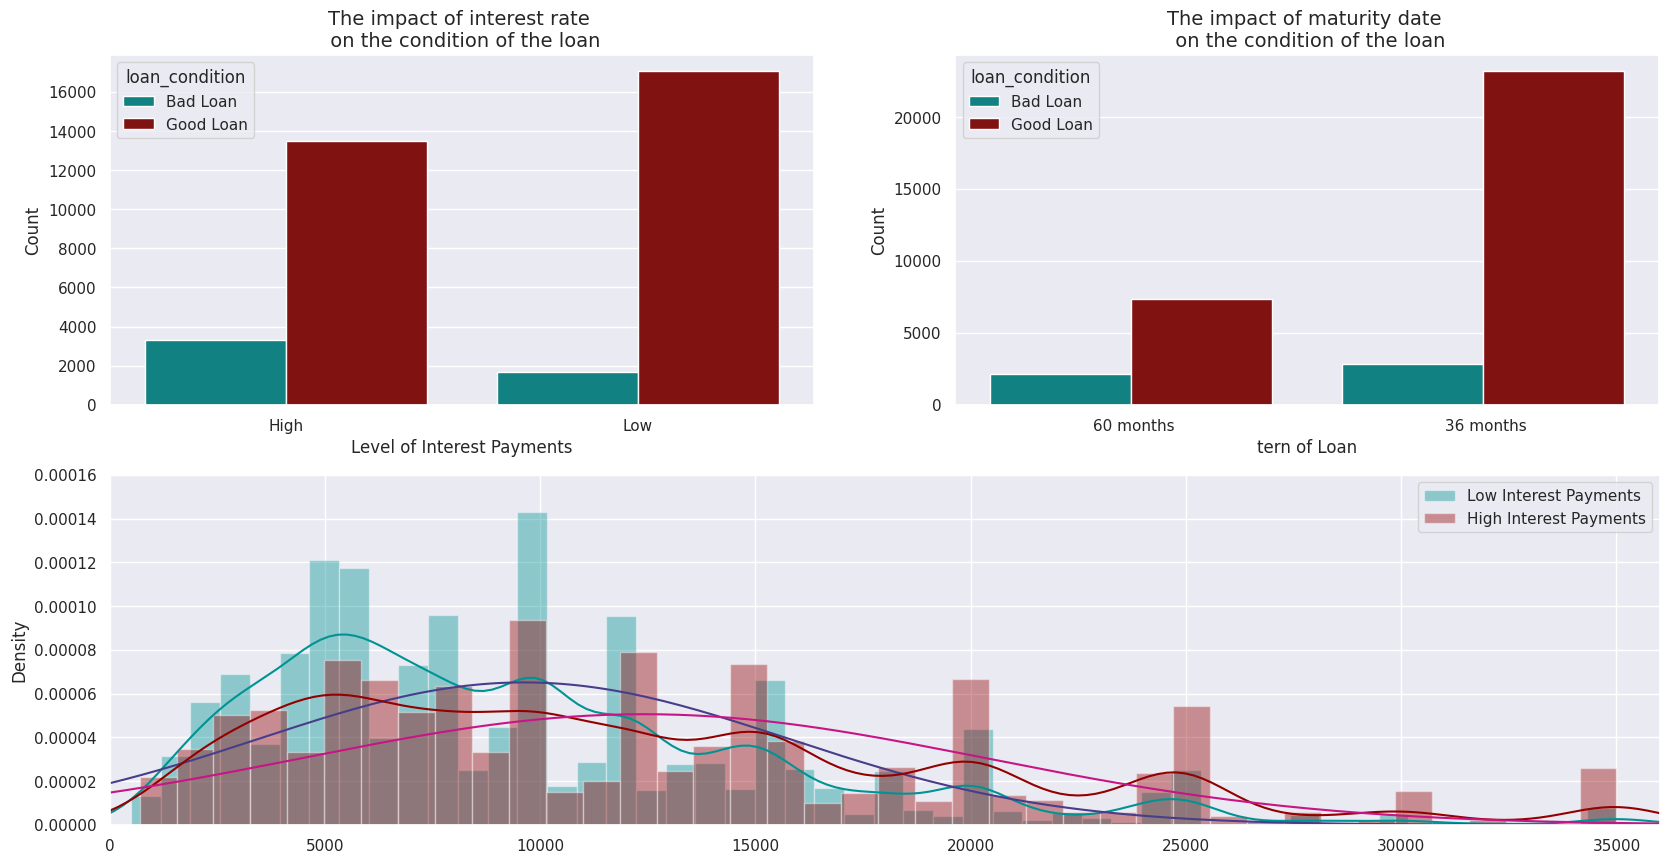

In [223]:
#lets plot our results
from scipy.stats import norm

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df,
                  palette=palette, hue='loan_condition')

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='term', data=df,
                   palette=palette, hue='loan_condition')

ax1.set_title('The impact of maturity date \n on the condition of the loan', fontsize=14)
ax1.set_xlabel('tern of Loan', fontsize=12)
ax1.set_ylabel('Count')


plt.subplot(212)
low = df['loan_amount'].loc[df['interest_payments'] == 'Low'].values
high = df['loan_amount'].loc[df['interest_payments'] == 'High'].values


ax2= sns.distplot(low, color='#009393', label='Low Interest Payments', fit=norm, fit_kws={"color":"#483d8b"}) # Dark Blue Norm Color
ax3 = sns.distplot(high, color='#930000', label='High Interest Payments', fit=norm, fit_kws={"color":"#c71585"}) #  Red Norm Color
plt.axis([0, 36000, 0, 0.00016])
plt.legend()


plt.show()

<ipython-input-224-55d067e96985>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45);


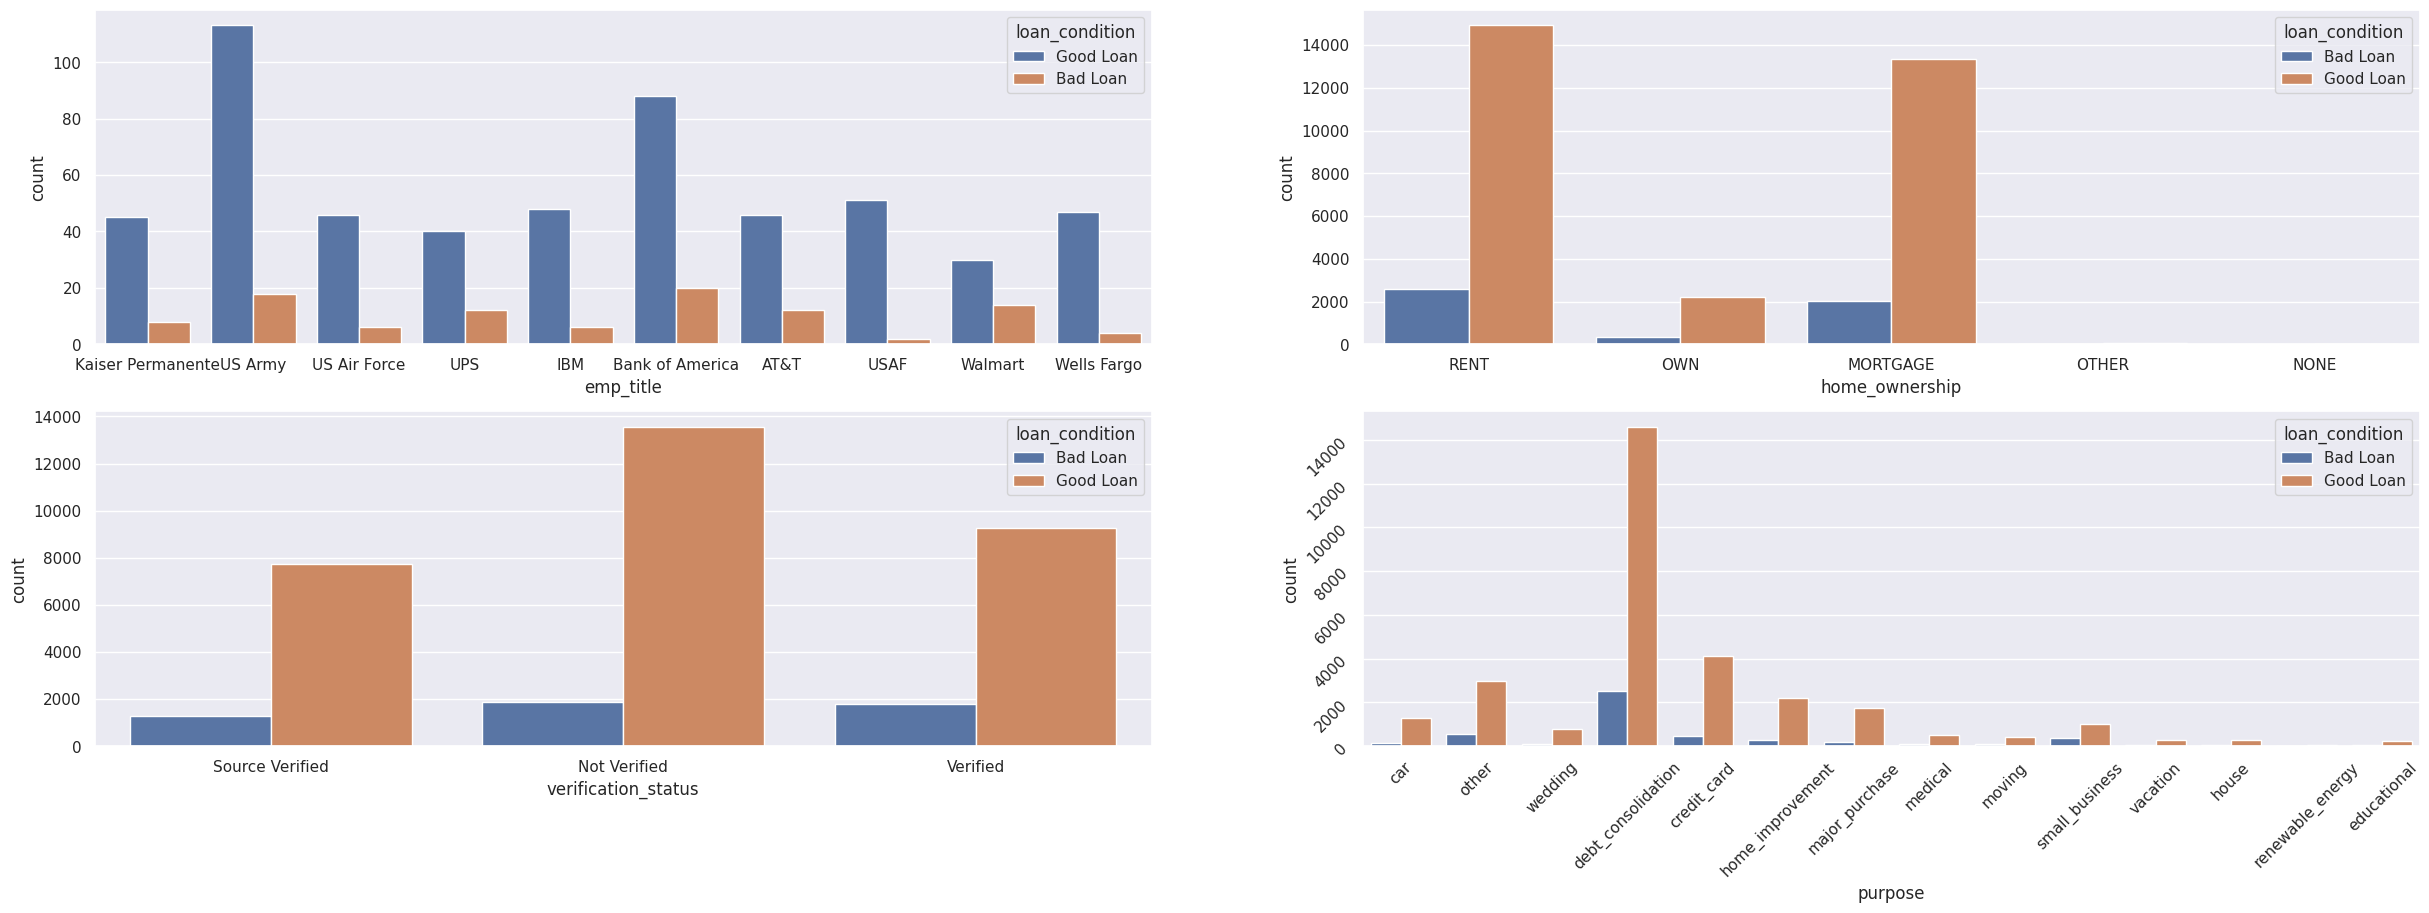

In [224]:
#also now looking at purpose and verification status and emp title
plt.figure(figsize=(30, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='emp_title', data=df[df['emp_title'].isin(df["emp_title"].value_counts()[:10].index.to_list())], hue='loan_condition')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_condition')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_condition')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_condition')
g.tick_params(labelrotation=45)
g.set_xticklabels(g.get_xticklabels(), rotation=45);